In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## **Lead scoring case study**

**Problem Statement** - Education company **X company** they launched online education advertisement on google platform and there is a poor conversion rate of 30%, So company wants to know the conversion hot leads.

In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

In [5]:
##Import the dataset
path1=("/content/drive/MyDrive/Colab Notebooks/data/Lead scoring assignment/Leads.csv")
lead=pd.read_csv(path1)
lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [6]:
lead.shape

(9240, 37)

In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [36]:
pip install sweetviz

In [37]:
import sweetviz as sv
sweet= sv.analyze(lead)
sweet.show_html('sweet.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **Data cleaning and modification**



In [10]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
## In dataset we have more number of missing values by replacing or eliminating the value will fix this

lead = lead.replace("Select", np.nan)


In [13]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [14]:
for column in lead.columns:
  if ((100*(lead[column].isnull().sum()/len(lead.index))) >= 30):
    lead.drop(column,1,inplace=True)

In [15]:
lead.shape

(9240, 27)

In [16]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [17]:
lead.drop(['Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [18]:
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [19]:
# Replacing the incorrect format values to correct format and changing the NaN value to Direct Traffic

lead['Lead Source']=lead['Lead Source'].replace('google','Google')

In [20]:
lead['Lead Source']=lead['Lead Source'].replace(np.nan,'Direct Traffic')

In [21]:
lead['Lead Source']=lead['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Other Platform')

In [22]:
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2579
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other Platform        23
Name: Lead Source, dtype: int64

In [23]:
## The most countries are not known and they are also large in number of missing values
## the same null values and unknown values as modified to Not Available

lead['Country']=lead['Country'].replace(np.nan,'Not available')
lead['Country']=lead['Country'].replace('unknown','Not available')

In [24]:
lead['Country'].value_counts(dropna=False)

India                   6492
Not available           2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark       

In [25]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [27]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [29]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
lead.dropna(inplace=True)

In [31]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [32]:
lead.shape

(9103, 25)

In [33]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [34]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [35]:
lead['TotalVisits']=lead['TotalVisits'].astype('int64')

In [36]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   int64  
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

##**Data Engineering**

In [37]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 35.9 MB/s eta 0:00:00


In [38]:
import sweetviz as sv
sweet= sv.analyze(lead)
sweet.show_html('sweet.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
lead.drop(["Do Not Call" , "What matters most to you in choosing a course" , "Search" , "Magazine" ,  "Newspaper Article" ,
              "X Education Forums" , "Newspaper", "Digital Advertisement", "Through Recommendations",
              "Receive More Updates About Our Courses", "Update me on Supply Chain Content" ,
              "Get updates on DM Content" , "I agree to pay the amount through cheque"], axis=1, inplace = True)

In [40]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   int64  
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Country                                 9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

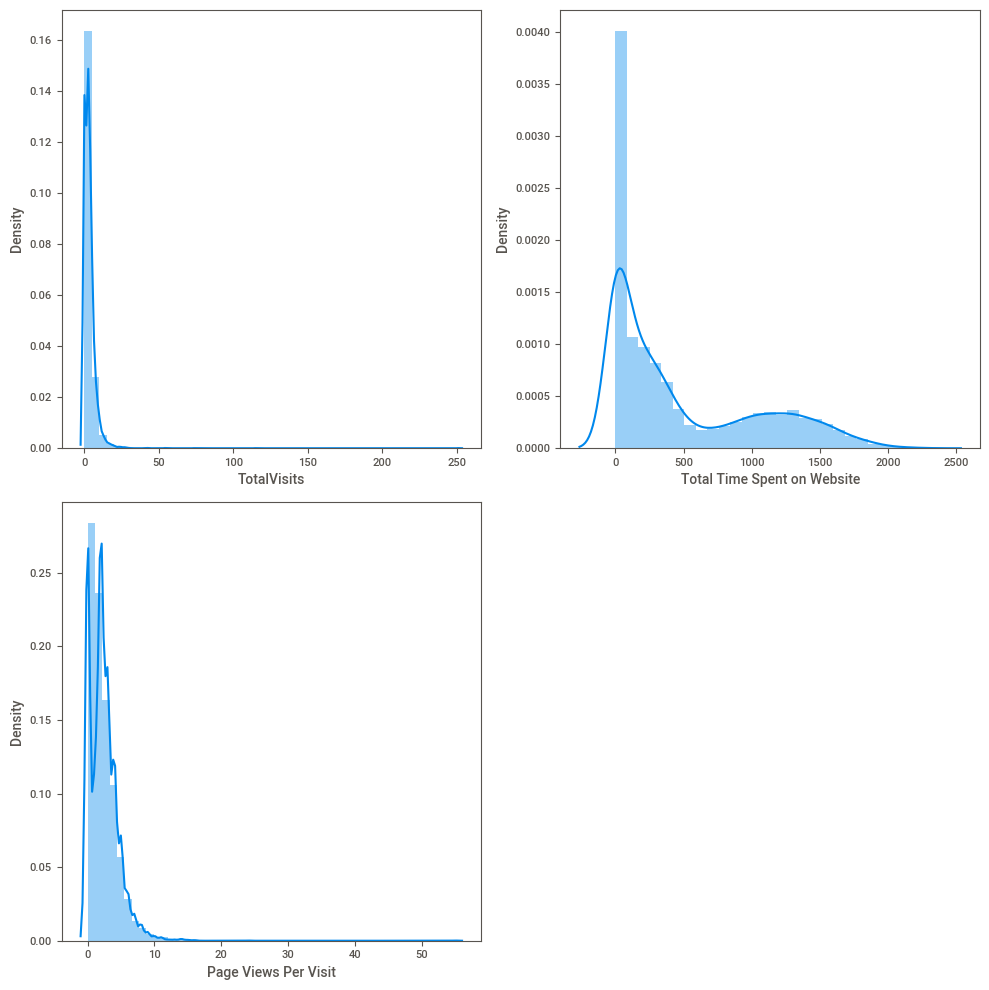

In [41]:
def plot(x, fig):
    plt.subplot(2,2,fig)
    sns.distplot(lead[x])
    plt.xlabel(x)


plt.figure(figsize=(10,10))

plot('TotalVisits',1)
plot('Total Time Spent on Website',2)
plot('Page Views Per Visit',3)

plt.tight_layout()

In [42]:
## Correlation of metrics

lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.354939,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


In [43]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   int64  
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Country                                 9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

In [44]:
lead.shape

(9103, 12)

In [45]:
cols = lead.select_dtypes(include ="object").columns
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

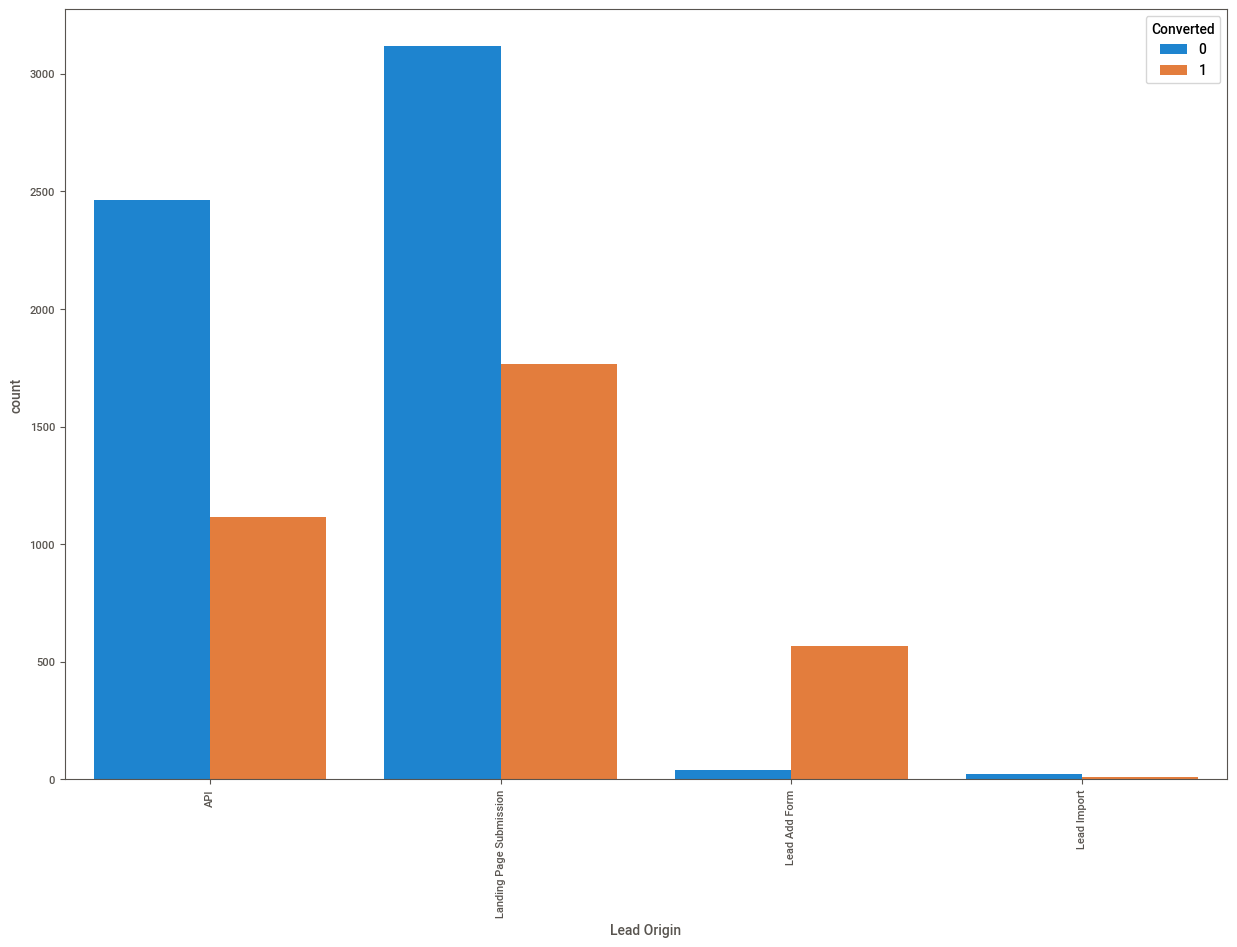

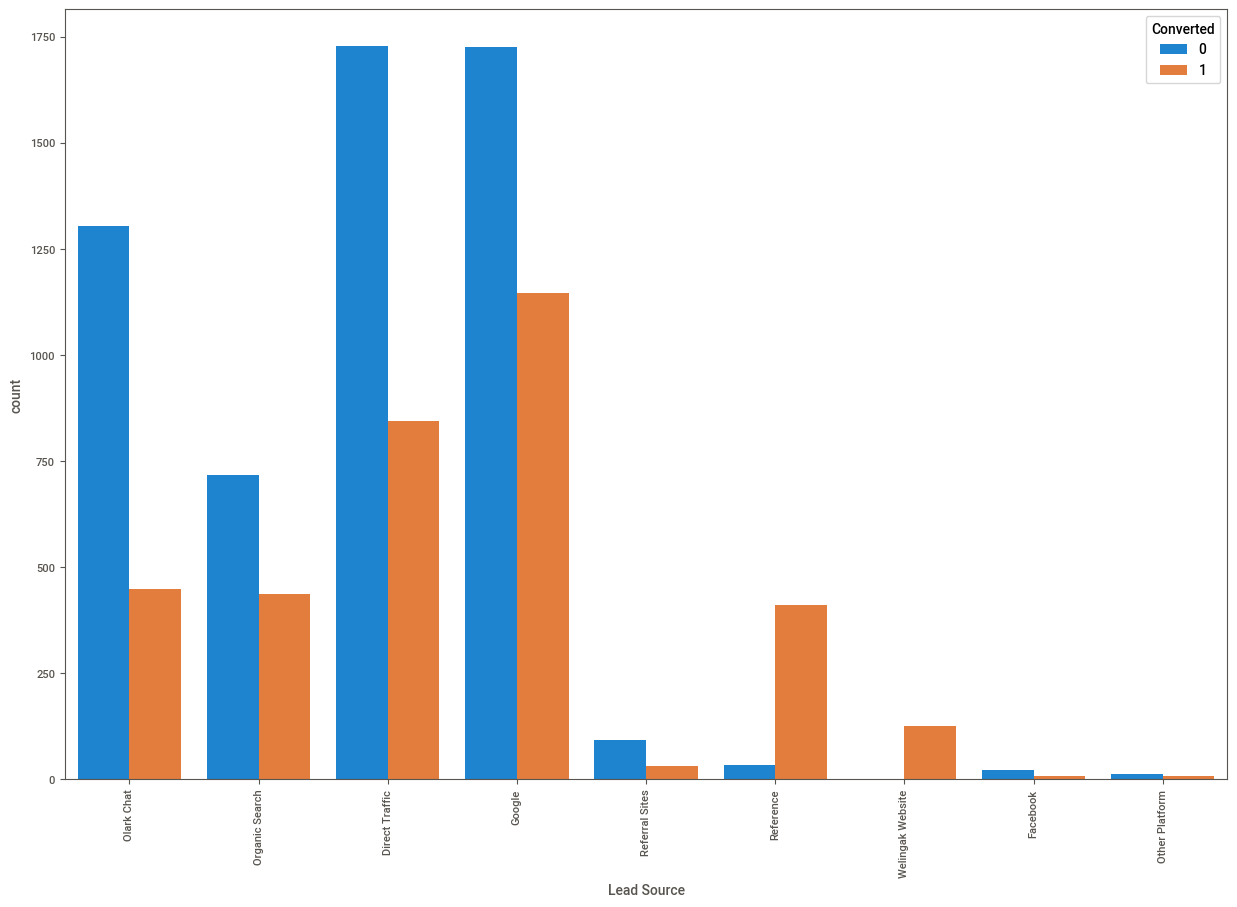

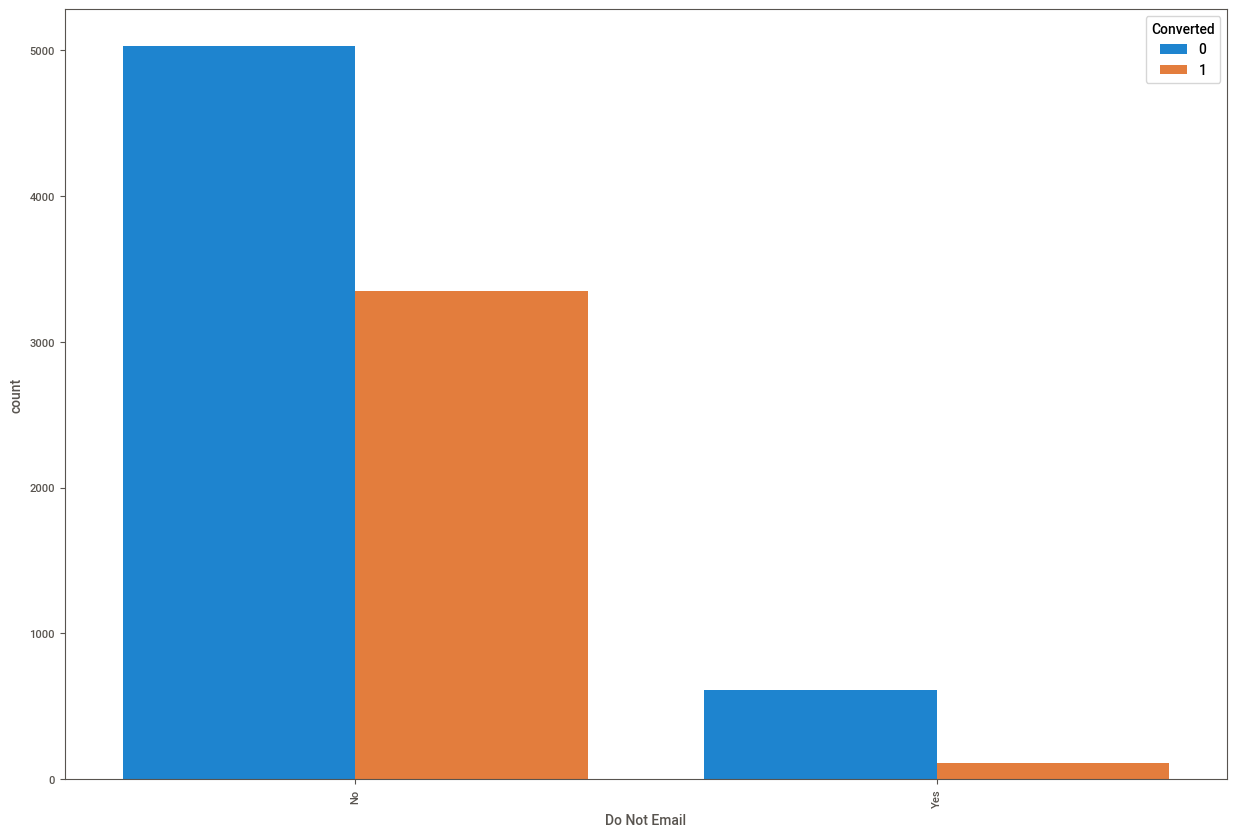

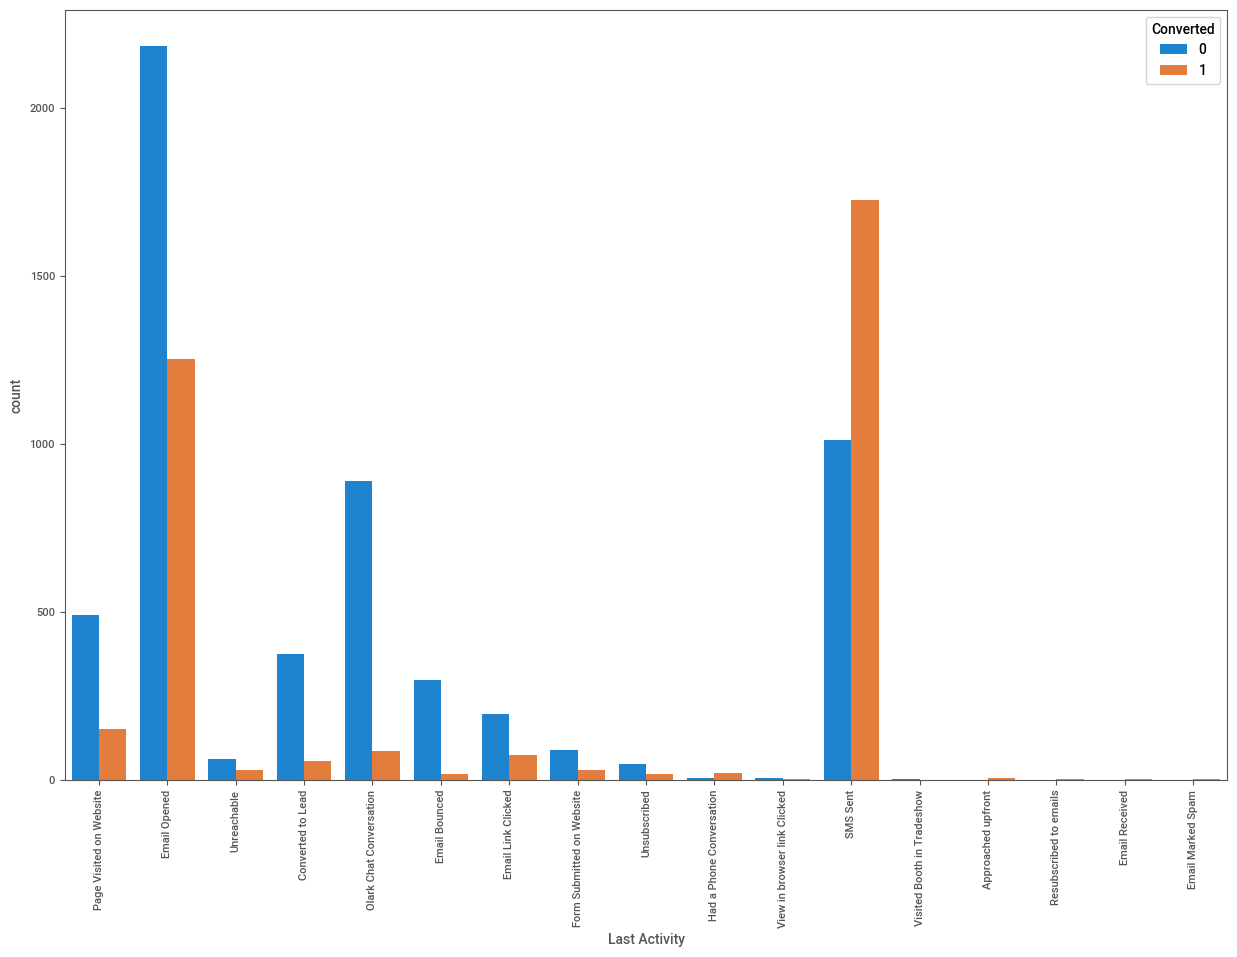

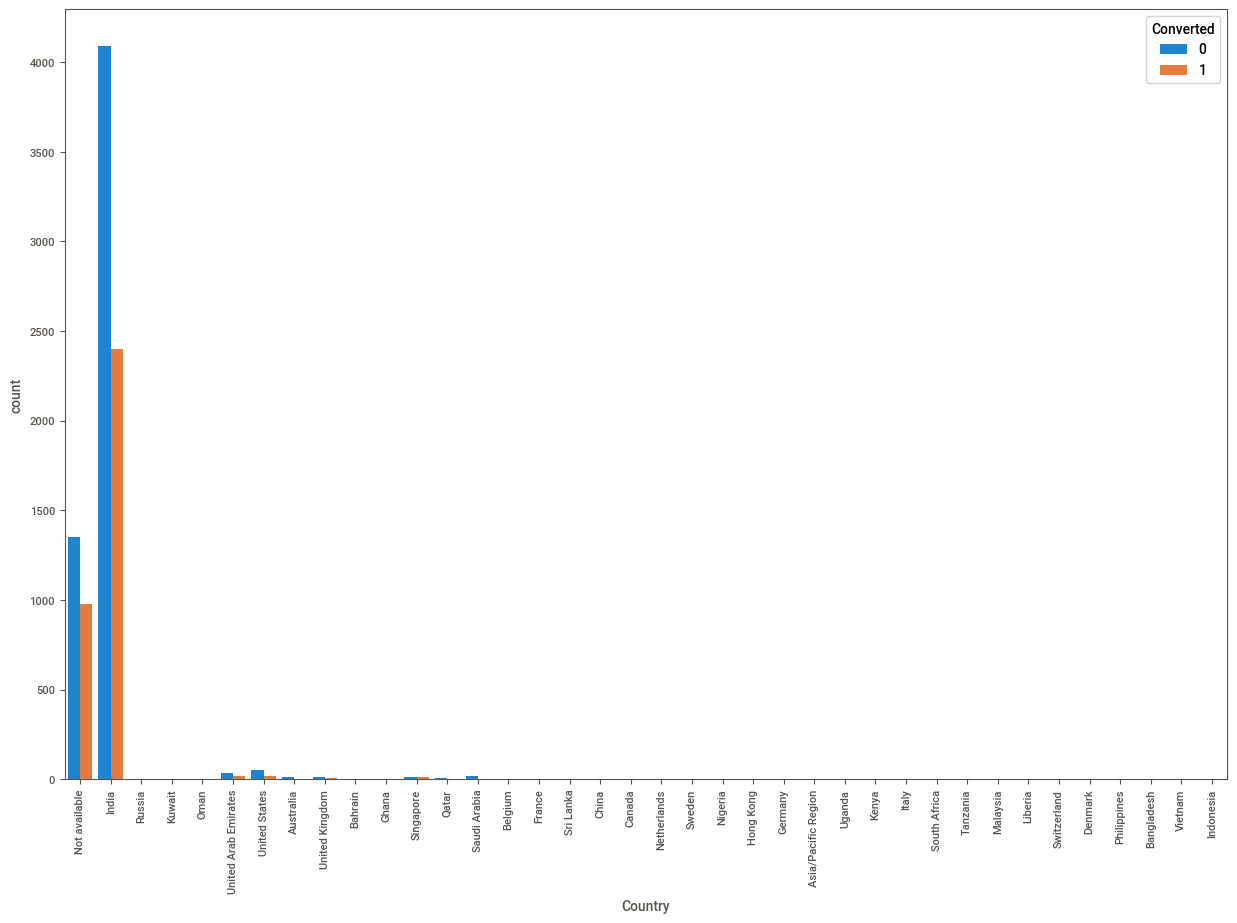

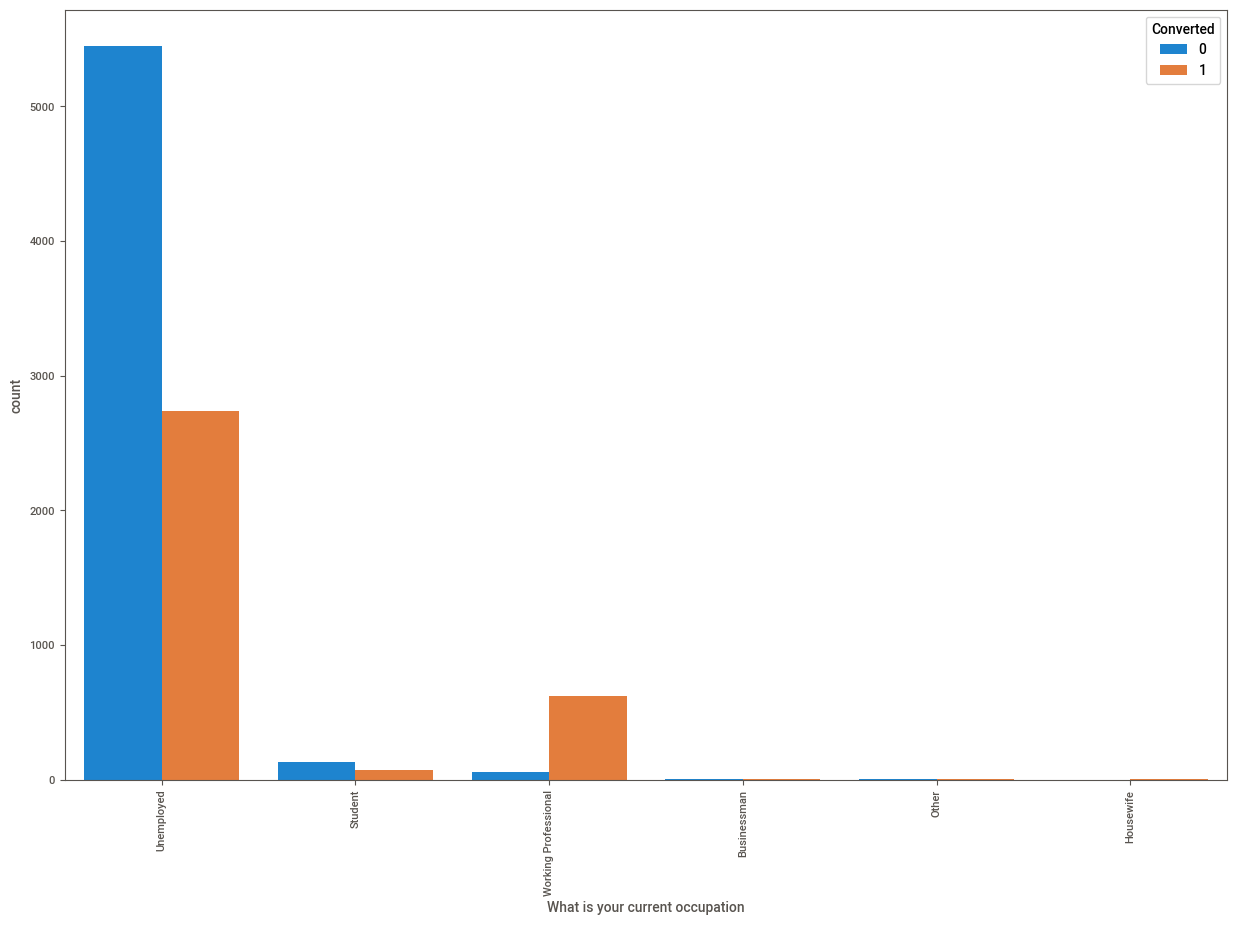

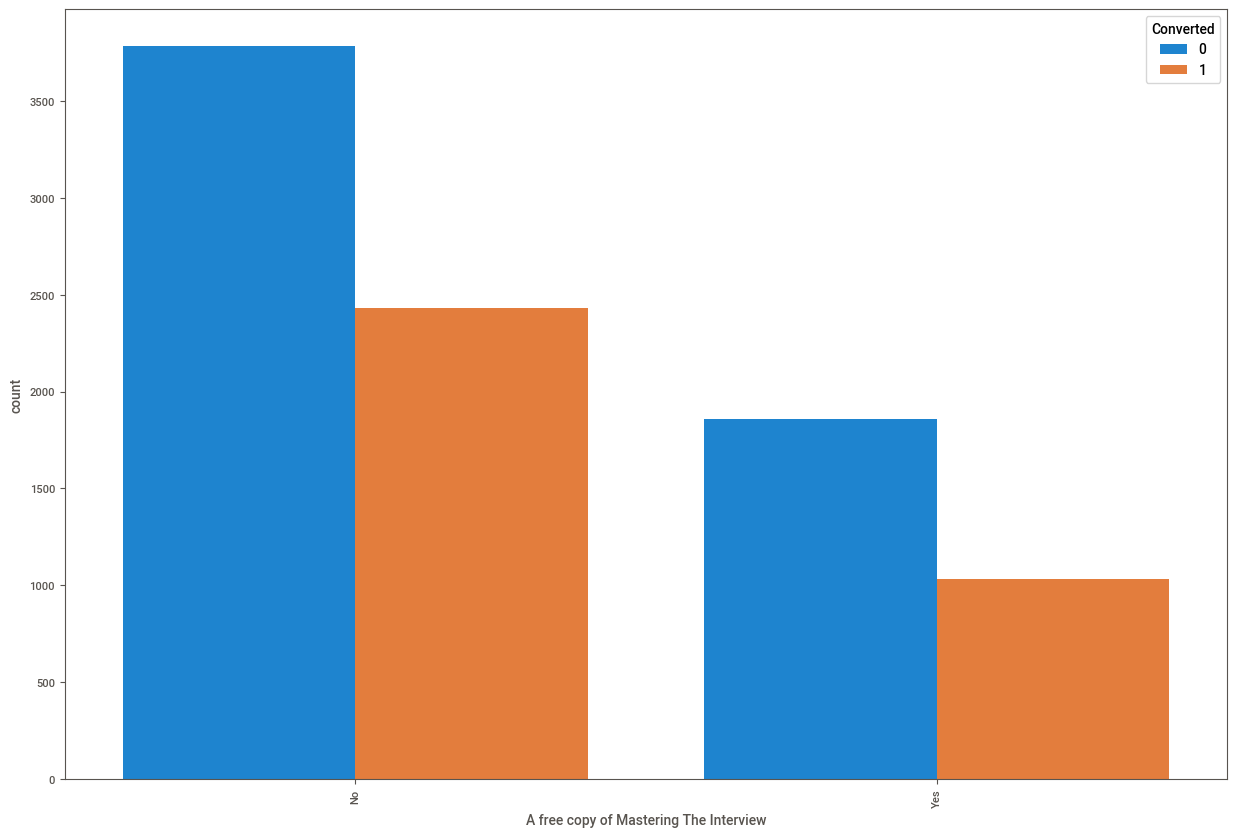

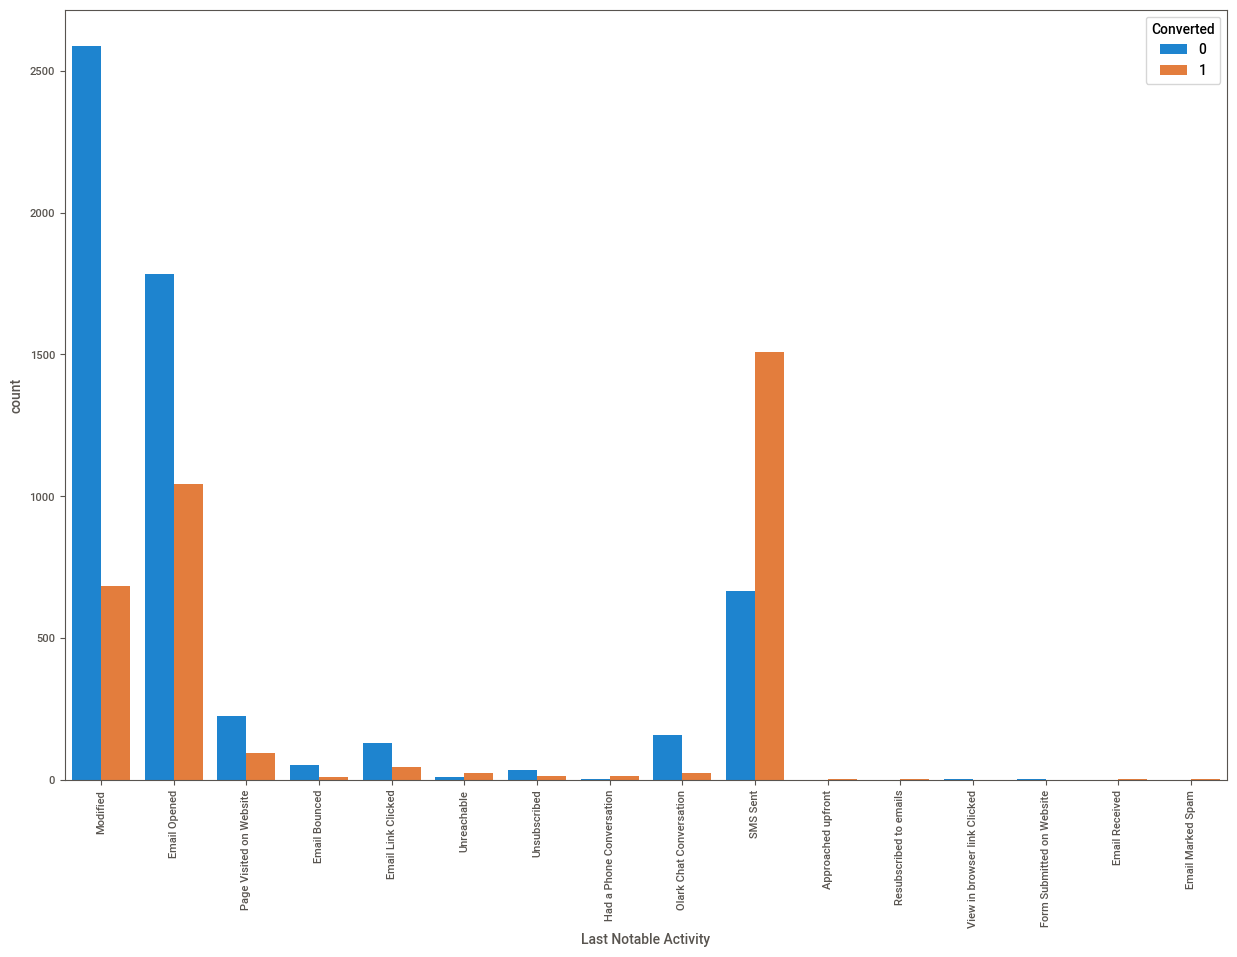

In [46]:
for i in cols:
    plt.figure(figsize=(15,10))
    sns.countplot(x=lead[i], hue='Converted', data = lead)
    plt.xticks(rotation = 90)
    plt.xlabel(i)
    plt.show()

In [47]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   int64  
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Country                                 9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   obje

## **Creating Dummy Variables**

In [48]:
temp= lead.loc[:, lead.dtypes==object]
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
dummy=pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first= True)

In [50]:
lead= pd.concat([lead, dummy], axis=1)

In [51]:
lead= lead.drop(temp, axis=1)


In [52]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


##**Train set and Test set**

Spliting the dataset into training and test

In [53]:
## Build Train and Test Model
from sklearn.model_selection import train_test_split

In [54]:
X=lead.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
y=lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=100)

## **Scaling the Model**

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler=MinMaxScaler()

In [59]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [60]:
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0.011952,0.570794,0.027273,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,0.027888,0.026631,0.127273,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0.019920,0.075011,0.045455,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,0.055777,0.550821,0.063636,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.030395,0.354939,-0.003328,-0.040698,0.306224,-0.010824,-0.010824,0.026621,-0.125395,...,-0.008209,0.044335,-0.264267,-0.071874,-0.034393,0.013383,0.362200,0.037599,-0.012218,-0.008209
TotalVisits,0.030395,1.000000,0.221240,0.512125,0.291913,-0.173909,-0.038378,-0.036824,0.108667,-0.311123,...,-0.003120,0.022386,-0.106497,-0.037643,0.227681,-0.007439,-0.003932,0.005640,0.000971,0.009834
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361,0.294515,-0.194106,-0.051363,-0.050020,0.216937,-0.376633,...,-0.003738,0.023007,-0.125220,-0.050408,0.029212,-0.009257,0.133511,0.009749,0.001349,-0.007545
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000,0.485950,-0.274411,-0.056927,-0.053437,0.207549,-0.500880,...,-0.001760,0.014035,-0.094396,-0.087941,0.026698,-0.011459,0.055602,0.019580,0.018047,0.001490
Lead Origin_Landing Page Submission,-0.040698,0.291913,0.294515,0.485950,1.000000,-0.287969,-0.062922,-0.059141,0.081497,-0.525681,...,0.009738,0.002730,-0.082726,-0.118075,0.043572,-0.011283,0.049199,-0.000655,0.014671,-0.011283
Lead Origin_Lead Add Form,0.306224,-0.173909,-0.194106,-0.274411,-0.287969,1.000000,-0.015639,-0.015639,-0.180728,-0.128421,...,-0.002804,-0.010500,-0.072827,-0.025779,-0.017349,-0.002804,0.124841,0.006414,-0.006994,-0.002804
Lead Origin_Lead Import,-0.010824,-0.038378,-0.051363,-0.056927,-0.062922,-0.015639,1.000000,0.967632,-0.039697,-0.028548,...,-0.000613,-0.002294,-0.008395,-0.008373,-0.011122,-0.000613,-0.028300,-0.003472,-0.004211,-0.000613
Lead Source_Facebook,-0.010824,-0.036824,-0.050020,-0.053437,-0.059141,-0.015639,0.967632,1.000000,-0.039697,-0.028548,...,-0.000613,-0.002294,-0.008395,-0.008373,-0.011122,-0.000613,-0.023875,-0.003472,-0.004211,-0.000613
Lead Source_Google,0.026621,0.108667,0.216937,0.207549,0.081497,-0.180728,-0.039697,-0.039697,1.000000,-0.331643,...,-0.007118,0.027635,-0.003964,-0.031588,0.000819,-0.007118,-0.004717,0.011583,-0.002750,0.015435
Lead Source_Olark Chat,-0.125395,-0.311123,-0.376633,-0.500880,-0.525681,-0.128421,-0.028548,-0.028548,-0.331643,1.000000,...,-0.005119,-0.012058,0.101782,0.166254,-0.054984,0.021463,-0.100180,-0.010178,-0.011860,-0.005119


## Model building and evaluation

Creating logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import statsmodels.api as sm

In [63]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Test Accuracy")
print(logreg.score(X_test,y_test))

predicted= logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.8168549905838042
Test Accuracy
0.488831929696082
[[ 350 1339]
 [  57  985]]
              precision    recall  f1-score   support

           0       0.86      0.21      0.33      1689
           1       0.42      0.95      0.59      1042

    accuracy                           0.49      2731
   macro avg       0.64      0.58      0.46      2731
weighted avg       0.69      0.49      0.43      2731



In [136]:
logreg.predict_proba(X_test)


array([[0.        , 1.        ],
       [0.04411657, 0.95588343],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

## **RFE and VIF Analysis**

In [64]:
from sklearn.feature_selection import RFE

In [65]:
rfe = RFE(logreg, n_features_to_select=15)
rfe= rfe.fit(X_train,y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Other Platform', False, 30),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Marked Spam', False, 23),
 ('Last Activity_Email Opened', False, 33),
 ('Last Activity_Email Received', False, 31),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Acti

In [67]:
col=X_train.columns[rfe.support_]
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [68]:
X_train=X_train[col]

In [69]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.4
Date:                Mon, 25 Dec 2023   Deviance:                       5322.8
Time:                        17:24:53   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3889
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4901      0.084    -29.502      0.000      -2.656      -2.325
TotalVisits                                              7.3657      2.184      3.372      0.001       3.085      11.646
Total Time Spent on Website                              4.5908      0.165     27.869      0.000       4.268       4.914
Lead Origin_Lead Add Form                                4.1287      0.228     18.148      0.000       3.683       4.575
Lead Origin_Lead Import                                  1.5648      0.447      3.497      0.000       0.688       2.442
Lead Source_Olark Chat                                   1.2467      0.110     11.300      0.000       1.030       1.463
Lead Source_Welingak Website                             1.9470      0.755      2.580      0.010       0.468       3.426
Do Not Email_Yes                                        -1.5428      0.164     -9.417      0.000      -1.864      -1.222
Last Activity_Converted to Lead                         -1.2255      0.211     -5.799      0.000      -1.640      -0.811
Last Activity_Had a Phone Conversation                   0.8785      0.854      1.028      0.304      -0.796       2.553
Last Activity_Olark Chat Conversation                   -1.4291      0.160     -8.908      0.000      -1.744      -1.115
What is your current occupation_Housewife               23.2890    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
What is your current occupation_Working Professional     2.8197      0.187     15.083      0.000       2.453       3.186
Last Notable Activity_Had a Phone Conversation           2.0827      1.410      1.477      0.140      -0.681       4.847
Last Notable Activity_SMS Sent                           1.5304      0.080     19.243      0.000       1.375       1.686
Last Notable Activity_Unreachable                        1.7517      0.508      3.451      0.001       0.757       2.747
========================================================================================================================
"""

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
X_train.drop('Last Activity_Olark Chat Conversation',axis=1,inplace=True)

In [72]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.4
Date:                Mon, 25 Dec 2023   Deviance:                       5420.9
Time:                        17:24:58   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5997      0.084    -30.775      0.000      -2.765      -2.434
TotalVisits                                              7.7935      2.195      3.551      0.000       3.492      12.095
Total Time Spent on Website                              4.6006      0.164     27.969      0.000       4.278       4.923
Lead Origin_Lead Add Form                                4.1921      0.228     18.414      0.000       3.746       4.638
Lead Origin_Lead Import                                  1.6664      0.449      3.714      0.000       0.787       2.546
Lead Source_Olark Chat                                   0.9464      0.105      8.988      0.000       0.740       1.153
Lead Source_Welingak Website                             1.9046      0.754      2.526      0.012       0.427       3.382
Do Not Email_Yes                                        -1.4912      0.165     -9.054      0.000      -1.814      -1.168
Last Activity_Converted to Lead                         -1.1259      0.211     -5.327      0.000      -1.540      -0.712
Last Activity_Had a Phone Conversation                   0.9713      0.855      1.136      0.256      -0.705       2.648
What is your current occupation_Housewife               23.3879    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
What is your current occupation_Working Professional     2.8421      0.186     15.251      0.000       2.477       3.207
Last Notable Activity_Had a Phone Conversation           2.0906      1.411      1.482      0.138      -0.674       4.855
Last Notable Activity_SMS Sent                           1.6769      0.079     21.286      0.000       1.523       1.831
Last Notable Activity_Unreachable                        1.8871      0.508      3.714      0.000       0.891       2.883
========================================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,Last Activity_Had a Phone Conversation,2.00
11,Last Notable Activity_Had a Phone Conversation,2.00
1,Total Time Spent on Website,1.60
2,Lead Origin_Lead Add Form,1.43
0,TotalVisits,1.37
12,Last Notable Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.32
10,What is your current occupation_Working Profes...,1.16
6,Do Not Email_Yes,1.05
4,Lead Source_Olark Chat,1.03


In [74]:
X_train.drop('What is your current occupation_Housewife',axis=1,inplace=True)

In [75]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.8
Date:                Mon, 25 Dec 2023   Deviance:                       5435.6
Time:                        17:25:09   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3779
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5882      0.084    -30.732      0.000      -2.753      -2.423
TotalVisits                                              7.6649      2.191      3.498      0.000       3.370      11.960
Total Time Spent on Website                              4.5994      0.164     28.000      0.000       4.277       4.921
Lead Origin_Lead Add Form                                4.1902      0.227     18.422      0.000       3.744       4.636
Lead Origin_Lead Import                                  1.6557      0.449      3.692      0.000       0.777       2.535
Lead Source_Olark Chat                                   0.9370      0.105      8.914      0.000       0.731       1.143
Lead Source_Welingak Website                             1.8977      0.754      2.517      0.012       0.420       3.375
Do Not Email_Yes                                        -1.4954      0.165     -9.084      0.000      -1.818      -1.173
Last Activity_Converted to Lead                         -1.1352      0.211     -5.373      0.000      -1.549      -0.721
Last Activity_Had a Phone Conversation                   0.9631      0.855      1.126      0.260      -0.713       2.639
What is your current occupation_Working Professional     2.8364      0.186     15.223      0.000       2.471       3.202
Last Notable Activity_Had a Phone Conversation           2.0901      1.411      1.482      0.138      -0.675       4.855
Last Notable Activity_SMS Sent                           1.6696      0.079     21.211      0.000       1.515       1.824
Last Notable Activity_Unreachable                        1.8796      0.508      3.700      0.000       0.884       2.875
========================================================================================================================
"""

In [76]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
8,Last Activity_Had a Phone Conversation,2.00
10,Last Notable Activity_Had a Phone Conversation,2.00
1,Total Time Spent on Website,1.60
2,Lead Origin_Lead Add Form,1.43
0,TotalVisits,1.37
11,Last Notable Activity_SMS Sent,1.34
5,Lead Source_Welingak Website,1.32
9,What is your current occupation_Working Profes...,1.16
6,Do Not Email_Yes,1.05
4,Lead Source_Olark Chat,1.03


In [77]:
cols=vif['Features']
cols

8                Last Activity_Had a Phone Conversation
10       Last Notable Activity_Had a Phone Conversation
1                           Total Time Spent on Website
2                             Lead Origin_Lead Add Form
0                                           TotalVisits
11                       Last Notable Activity_SMS Sent
5                          Lead Source_Welingak Website
9     What is your current occupation_Working Profes...
6                                      Do Not Email_Yes
4                                Lead Source_Olark Chat
7                       Last Activity_Converted to Lead
12                    Last Notable Activity_Unreachable
3                               Lead Origin_Lead Import
Name: Features, dtype: object

## **Model Building**


In [78]:
y_train_pred= res.predict(sm.add_constant(X_train))
y_train_pred[:10]

7962    0.857941
5520    0.095181
1962    0.110022
1566    0.961178
9170    0.160943
5097    0.160943
8954    0.498394
309     0.130265
5519    0.504591
1050    0.424579
dtype: float64

In [79]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85794058, 0.09518089, 0.11002226, 0.96117809, 0.16094322,
       0.16094322, 0.49839363, 0.1302649 , 0.50459123, 0.42457916])

In [80]:
y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.857941
1,0,0.095181
2,0,0.110022
3,1,0.961178
4,0,0.160943


In [81]:
y_train_pred_final['Predicted']=y_train_pred_final['Converted_prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.857941,1
1,0,0.095181,0
2,0,0.110022,0
3,1,0.961178,1
4,0,0.160943,0


## **Calculating Confusion matrix**

In [82]:
from sklearn import metrics


In [83]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3504  449]
 [ 745 1674]]


In [84]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.812617702448211


In [85]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
Sensitivity= float(TP/(TP+FN))
Sensitivity

0.6920214964861513

In [87]:
Specificity= float(TN/(TN+FP))
Specificity

0.8864153807235011

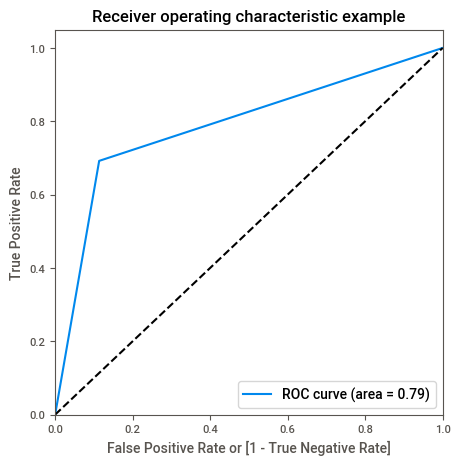

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [89]:
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.857941,1,1,1,1,1,1,1,1,1,1,0
1,0,0.095181,0,1,0,0,0,0,0,0,0,0,0
2,0,0.110022,0,1,1,0,0,0,0,0,0,0,0
3,1,0.961178,1,1,1,1,1,1,1,1,1,1,1
4,0,0.160943,0,1,1,0,0,0,0,0,0,0,0


In [90]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.528719  0.969822  0.258791
0.2   0.2  0.778249  0.866474  0.724260
0.3   0.3  0.798493  0.833402  0.777131
0.4   0.4  0.809479  0.765192  0.836580
0.5   0.5  0.812618  0.692021  0.886415
0.6   0.6  0.795825  0.578752  0.928662
0.7   0.7  0.780917  0.501447  0.951935
0.8   0.8  0.761927  0.421662  0.970149
0.9   0.9  0.715003  0.267053  0.989122


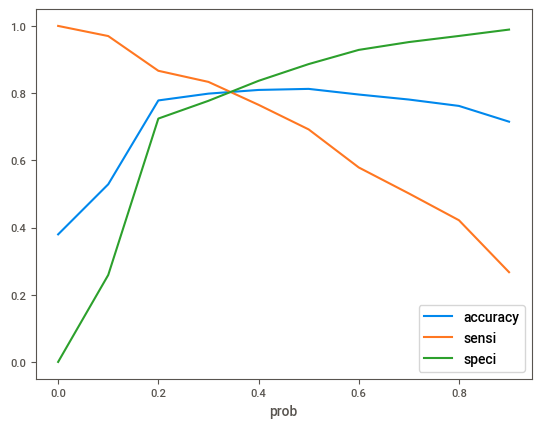

In [91]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [92]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
# Calculate accuracy
print(confusion)

[[3504  449]
 [ 745 1674]]


In [93]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [94]:
Precision= float(TP/(TP+FP))
Precision

0.7885068299576071

In [95]:
Recall=float(TP/(TP+FN))
Recall


0.6920214964861513

In [96]:
from sklearn.metrics import precision_score,recall_score


In [97]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.7885068299576071

In [98]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)


0.6920214964861513

## **Precision and Recall trade off**

In [99]:
from sklearn.metrics import precision_recall_curve


In [100]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [101]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

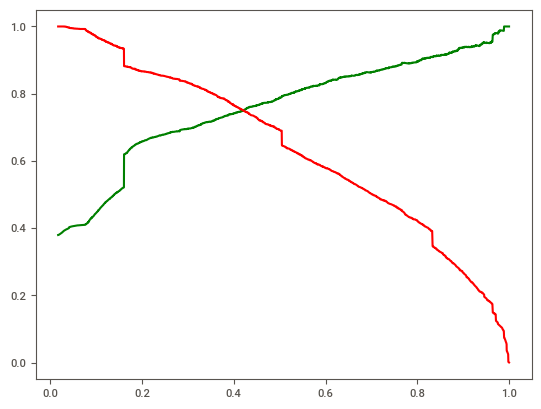

In [102]:
plt.plot(thresholds,p[:-1], "g-")
plt.plot(thresholds,r[:-1], "r-")

## **Predictions with test set**

In [103]:
X_test=X_test[cols]
X_test.head()

,Last Activity_Had a Phone Conversation,Last Notable Activity_Had a Phone Conversation,Total Time Spent on Website,Lead Origin_Lead Add Form,TotalVisits,Last Notable Activity_SMS Sent,Lead Source_Welingak Website,What is your current occupation_Working Professional,Do Not Email_Yes,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Notable Activity_Unreachable,Lead Origin_Lead Import
3504,0,0,424,0,3,0,0,0,0,0,0,0,0
4050,0,0,0,1,0,1,0,0,0,0,0,0,0
7201,0,0,712,0,2,1,0,0,1,0,0,0,0
1196,0,0,423,0,4,0,0,0,0,0,0,0,0
8219,0,0,247,0,7,0,0,0,0,0,0,0,0


In [104]:
X_test_sm = sm.add_constant(X_test)

In [105]:
y_test_pred = res.predict(X_test_sm)


FloatingPointError: ignored

In [106]:
y_test_pred[:10]


NameError: ignored

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)


In [108]:
y_test_df = pd.DataFrame(y_test)


In [109]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

NameError: ignored

In [110]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


NameError: ignored

In [111]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})


NameError: ignored

In [112]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

NameError: ignored

In [113]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)


NameError: ignored